# 기본 모듈 및 그래프 설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime
import os

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)

In [3]:
# 그래프에서 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [4]:
np.set_printoptions(precision=3)            # 소수점 3번째 자리에서 반올림
pd.set_option('display.max_rows', None)     # Row 생략없이 출력
pd.set_option('display.max_columns', None)  # Column 생략없이 출력
pd.set_option('display.max_colwidth', None) # 컬럼의 내용이 길어도 생략없이 출력
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.5f}'.format) # 8.500000e+01 이런 형식의 지수표현을 하고 싶지 않을 경우

# 이수현_국내 화장품 생산지수1

In [24]:
df = pd.read_excel("./이수현_자료/변형/국내화장품생산지수1.xlsx")
df.head()

,Unnamed: 0,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,업체수,130,152,230,330,360,252,284,358,395,430,526,591,829,"1,480","1,895","2,735","3,840","4,961","5,289","6,487","7,580","8,942","9,359","10,119","11,861"
1,증감률,-4.4,16.9,51.3,43.5,9.1,-30.0,12.7,26.1,10.3,8.9,22.3,12.4,40.3,78.5,28.0,44.0,40.0,29.2,6.6,22.7,16.8,18.0,4.7,7.5,17.2
2,품목수,"17,073","21,108","28,600","33,835","46,440","37,215","44,313","48,496","51,579","65,535","76,099","85,533","93,682","101,296","88,806","101,362","105,318","119,051","125,766","124,560","119,443","120,192","120,044","124,004","127,956"
3,증감률,11.0,23.6,35.5,18.3,37.3,-19.9,19.1,9.4,6.4,27.1,16.1,12.4,9.5,8.1,-12.3,14.1,3.9,13.0,5.6,-1.0,-4.1,0.6,-0.1,3.3,3.2
4,생산금액,"2,800,110","3,104,985","3,410,027","3,745,656","3,459,038","3,451,158","3,692,667","3,980,329","4,073,744","4,720,053","5,168,589","6,014,551","6,385,616","7,122,666","7,972,072","8,970,370","10,732,853","13,051,380","13,515,515","15,502,800","16,263,316","15,161,717","16,653,313","13,590,776","14,510,243"


## 안봐도됨

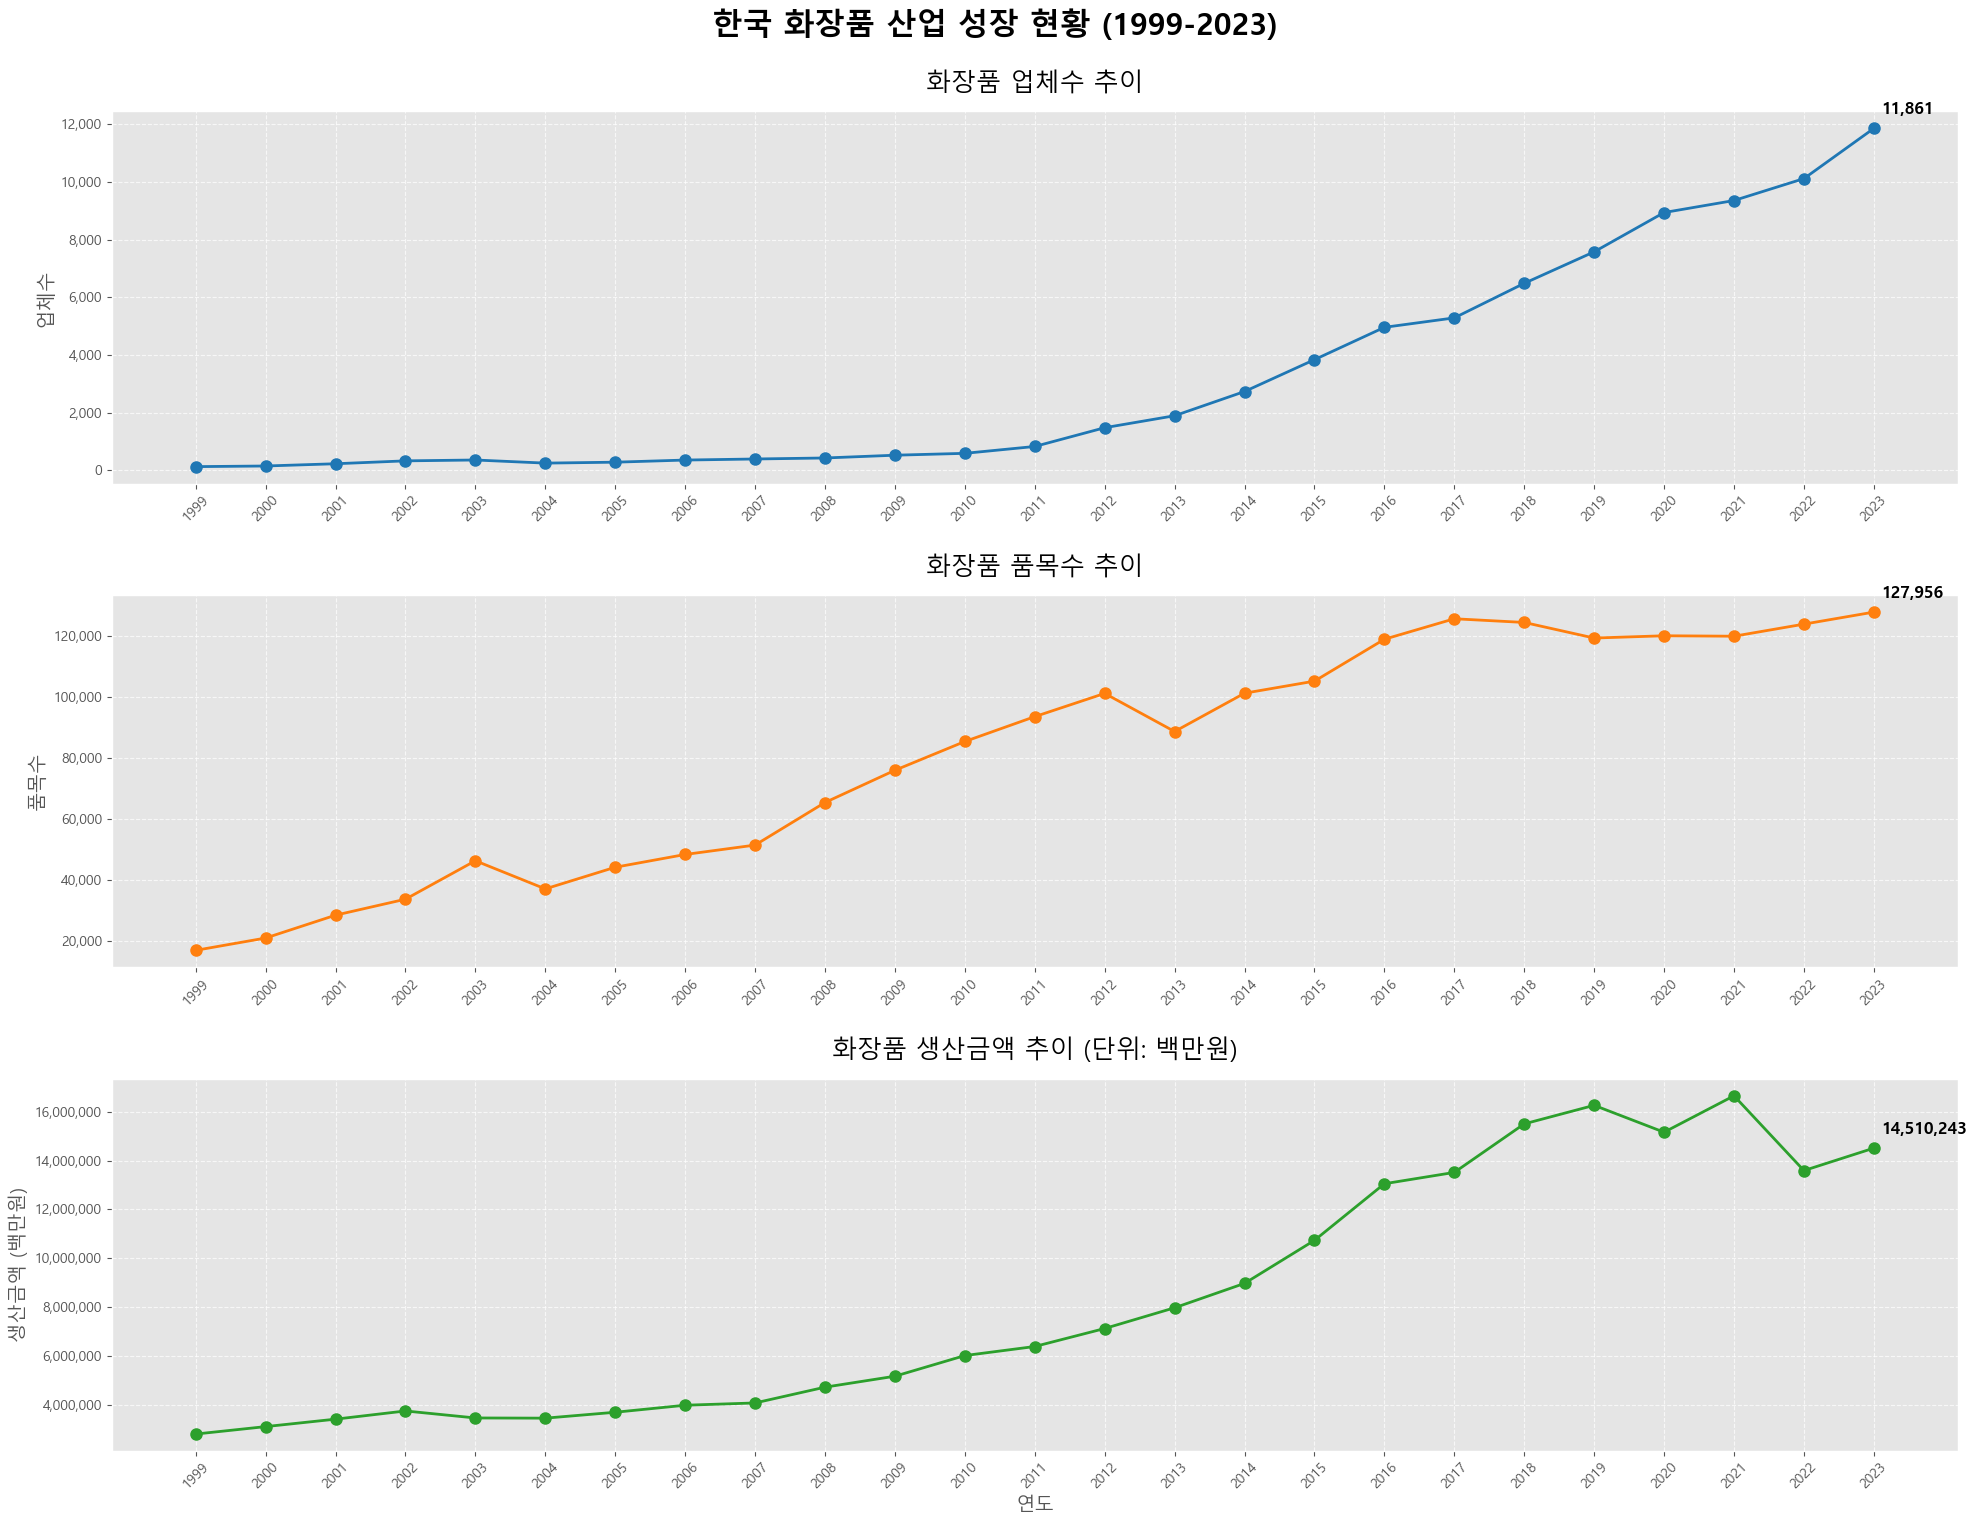

In [33]:
# 그래프 스타일 설정 (seaborn 없이)
plt.style.use('ggplot')  # matplotlib 내장 스타일

# 색상 정의
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # matplotlib 기본 색상

# 그림 생성
fig = plt.figure(figsize=(20, 16))
fig.suptitle('한국 화장품 산업 성장 현황 (1999-2023)', fontsize=22, fontweight='bold', y=0.95)

# 첫 번째 서브플롯 - 업체수
ax1 = plt.subplot(3, 1, 1)
years = df.columns[1:].astype(str).tolist()
companies = df.iloc[0, 1:].tolist()

# 쉼표가 있는 문자열 값을 숫자로 변환
companies = [int(str(x).replace(',', '')) if isinstance(x, str) else x for x in companies]

# 데이터 플롯
ax1.plot(years, companies, marker='o', linewidth=2, markersize=8, color=colors[0])
ax1.set_title('화장품 업체수 추이', fontsize=18, pad=15)
ax1.set_ylabel('업체수', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid(True, linestyle='--', alpha=0.7)

# 주요 지점 주석 추가
last_year = years[-1]
last_value = companies[-1]
ax1.annotate(f'{last_value:,}', 
             xy=(last_year, last_value), 
             xytext=(5, 10),
             textcoords='offset points',
             fontsize=12,
             fontweight='bold')

# 두 번째 서브플롯 - 품목수
ax2 = plt.subplot(3, 1, 2)
products = df.iloc[2, 1:].tolist()

# 쉼표가 있는 문자열 값을 숫자로 변환
products = [int(str(x).replace(',', '')) if isinstance(x, str) else x for x in products]

# 데이터 플롯
ax2.plot(years, products, marker='o', linewidth=2, markersize=8, color=colors[1])
ax2.set_title('화장품 품목수 추이', fontsize=18, pad=15)
ax2.set_ylabel('품목수', fontsize=14)
ax2.tick_params(axis='x', rotation=45)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.grid(True, linestyle='--', alpha=0.7)

# 주요 지점 주석 추가
last_value = products[-1]
ax2.annotate(f'{last_value:,}', 
             xy=(last_year, last_value), 
             xytext=(5, 10),
             textcoords='offset points',
             fontsize=12,
             fontweight='bold')

# 세 번째 서브플롯 - 생산금액
ax3 = plt.subplot(3, 1, 3)
production = df.iloc[4, 1:].tolist()

# 쉼표가 있는 문자열 값을 숫자로 변환
production = [int(str(x).replace(',', '')) if isinstance(x, str) else x for x in production]

# 데이터 플롯
ax3.plot(years, production, marker='o', linewidth=2, markersize=8, color=colors[2])
ax3.set_title('화장품 생산금액 추이 (단위: 백만원)', fontsize=18, pad=15)
ax3.set_xlabel('연도', fontsize=14)
ax3.set_ylabel('생산금액 (백만원)', fontsize=14)
ax3.tick_params(axis='x', rotation=45)
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax3.grid(True, linestyle='--', alpha=0.7)

# 주요 지점 주석 추가
last_value = production[-1]
ax3.annotate(f'{last_value:,}', 
             xy=(last_year, last_value), 
             xytext=(5, 10),
             textcoords='offset points',
             fontsize=12,
             fontweight='bold')

# 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.3)

# 그래프 표시
plt.show()

## 시각화

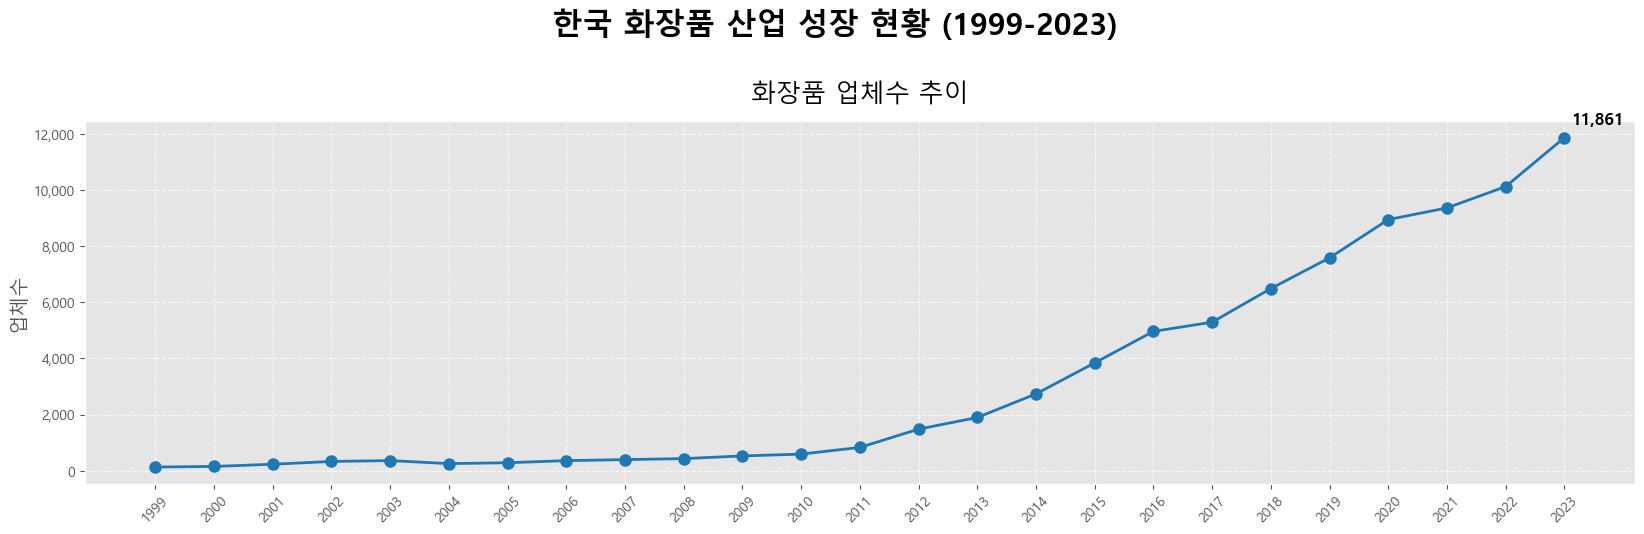

In [38]:
# 그림 생성
fig = plt.figure(figsize=(20, 16))
fig.suptitle('한국 화장품 산업 성장 현황 (1999-2023)', fontsize=22, fontweight='bold', y=0.95)

# 첫 번째 서브플롯 - 업체수
ax1 = plt.subplot(3, 1, 1)
years = df.columns[1:].astype(str).tolist()
companies = df.iloc[0, 1:].tolist()

# 쉼표가 있는 문자열 값을 숫자로 변환
companies = [int(str(x).replace(',', '')) if isinstance(x, str) else x for x in companies]

# 데이터 플롯
ax1.plot(years, companies, marker='o', linewidth=2, markersize=8, color=colors[0])
ax1.set_title('화장품 업체수 추이', fontsize=18, pad=15)
ax1.set_ylabel('업체수', fontsize=14)
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid(True, linestyle='--', alpha=0.7)

# 주요 지점 주석 추가
last_year = years[-1]
last_value = companies[-1]
ax1.annotate(f'{last_value:,}', 
             xy=(last_year, last_value), 
             xytext=(5, 10),
             textcoords='offset points',
             fontsize=12,
             fontweight='bold')

plt.savefig('화장품_산업_성장_현황.png', dpi=300, bbox_inches='tight')
plt.show()

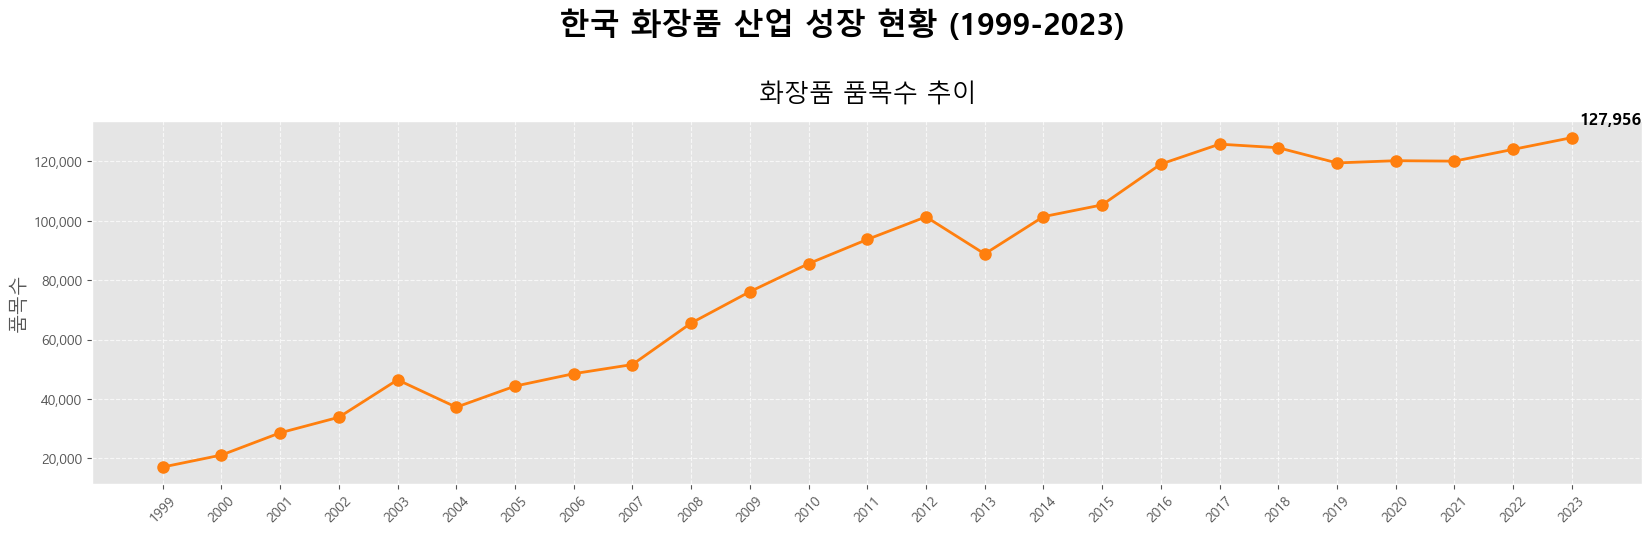

In [49]:
# 그림 생성
fig = plt.figure(figsize=(20, 16))
fig.suptitle('한국 화장품 산업 성장 현황 (1999-2023)', fontsize=22, fontweight='bold', y=0.95)

# 두 번째 서브플롯 - 품목수
ax2 = plt.subplot(3, 1, 1)
products = df.iloc[2, 1:].tolist()

# 쉼표가 있는 문자열 값을 숫자로 변환
products = [int(str(x).replace(',', '')) if isinstance(x, str) else x for x in products]

# 데이터 플롯
ax2.plot(years, products, marker='o', linewidth=2, markersize=8, color=colors[1])
ax2.set_title('화장품 품목수 추이', fontsize=18, pad=15)
ax2.set_ylabel('품목수', fontsize=14)
ax2.tick_params(axis='x', rotation=45)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.grid(True, linestyle='--', alpha=0.7)

# 주요 지점 주석 추가
last_value = products[-1]
ax2.annotate(f'{last_value:,}', 
             xy=(last_year, last_value), 
             xytext=(5, 10),
             textcoords='offset points',
             fontsize=12,
             fontweight='bold')

plt.savefig('화장품_품목수_추이.png', dpi=300, bbox_inches='tight')
plt.show()

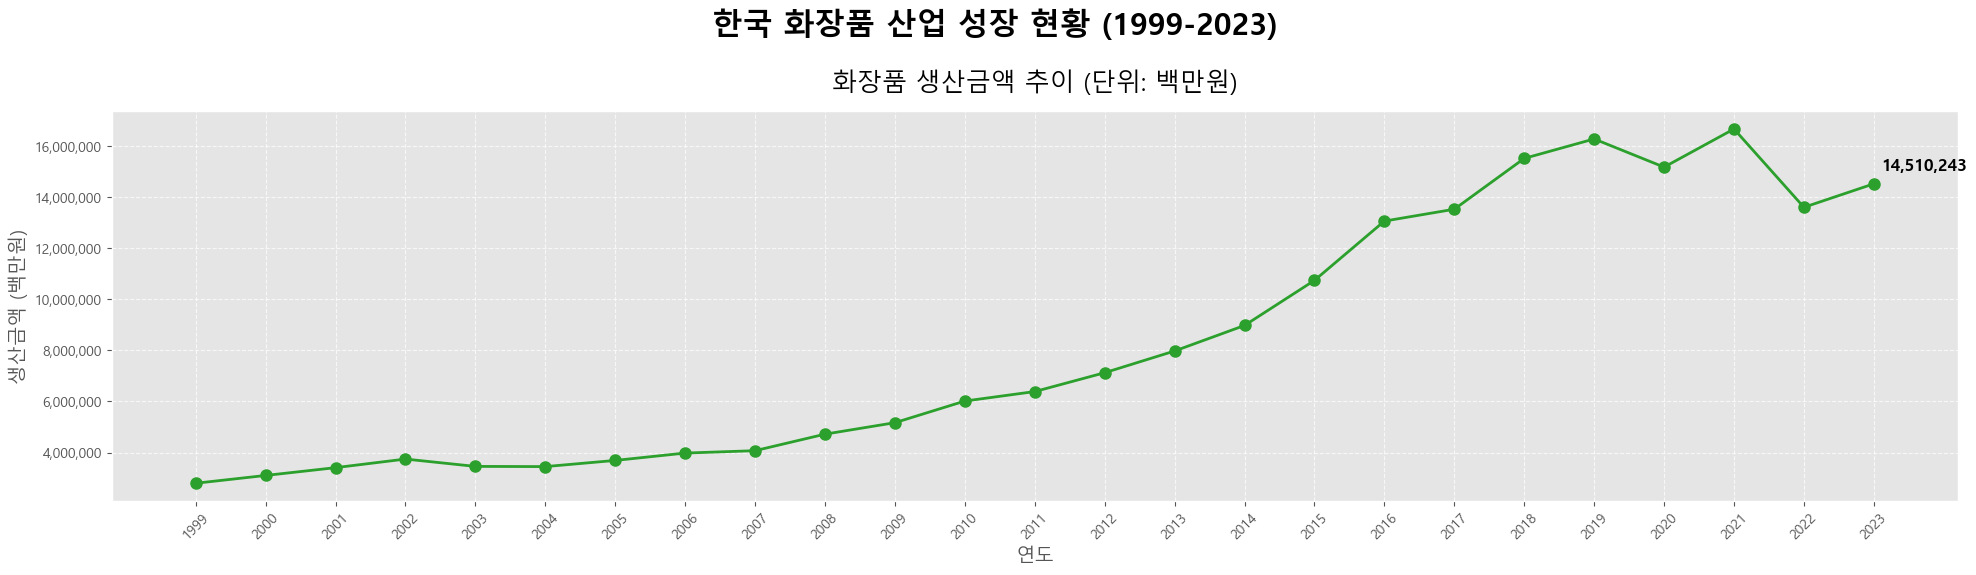

In [53]:
# 그림 생성
fig = plt.figure(figsize=(20, 16))
fig.suptitle('한국 화장품 산업 성장 현황 (1999-2023)', fontsize=22, fontweight='bold', y=0.95)

# 세 번째 서브플롯 - 생산금액
ax3 = plt.subplot(3, 1, 1)
production = df.iloc[4, 1:].tolist()

# 쉼표가 있는 문자열 값을 숫자로 변환
production = [int(str(x).replace(',', '')) if isinstance(x, str) else x for x in production]

# 데이터 플롯
ax3.plot(years, production, marker='o', linewidth=2, markersize=8, color=colors[2])
ax3.set_title('화장품 생산금액 추이 (단위: 백만원)', fontsize=18, pad=15)
ax3.set_xlabel('연도', fontsize=14)
ax3.set_ylabel('생산금액 (백만원)', fontsize=14)
ax3.tick_params(axis='x', rotation=45)
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax3.grid(True, linestyle='--', alpha=0.7)

# 주요 지점 주석 추가
last_value = production[-1]
ax3.annotate(f'{last_value:,}', 
             xy=(last_year, last_value), 
             xytext=(5, 10),
             textcoords='offset points',
             fontsize=12,
             fontweight='bold')

# 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.3)

plt.savefig('화장품_생산금액_추이.png', dpi=300, bbox_inches='tight')
plt.show()

# 이수현_국내 화장품 생산지수2

In [5]:
df2 = pd.read_excel("./이수현_자료/국내 화장품 생산지수2.xlsx")
df2.head()

C:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,항목,2018,2018.1,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2,2023,2023.1,2023.2
0,항목,원데이터,전년 대비 증감,증감률,원데이터,전년 대비 증감,증감률,원데이터,전년 대비 증감,증감률,원데이터,전년 대비 증감,증감률,원데이터,전년 대비 증감,증감률,원데이터,전년 대비 증감,증감률
1,생산액 (백만원),15502800,1987293,14.70000,16263316,760516,4.90000,15161717,-1101599,-6.80000,16653313,1491596,9.80000,13590776,-3062537,-18.40000,14510243,919467,6.80000
2,수출액 (백만원),6889842,1300027,23.30000,7608622,718780,10.40000,8935150,1326528,17.40000,10511606,1576456,17.60000,10277121,-234485,-2.20000,11046873,769752,7.50000
3,수입액 (백만원),1420038,90331,6.80000,1458314,38276,2.70000,1378367,-79947,-5.50000,1493988,115621,8.40000,1712338,218350,14.60000,1714510,2172,0.10000
4,무역수지 (백만원),5469804,1209695,28.40000,6150308,680504,12.40000,7556783,1406475,22.90000,9017618,1460835,19.30000,8564783,-452835,-5,9332363,767580,9


## 시각화

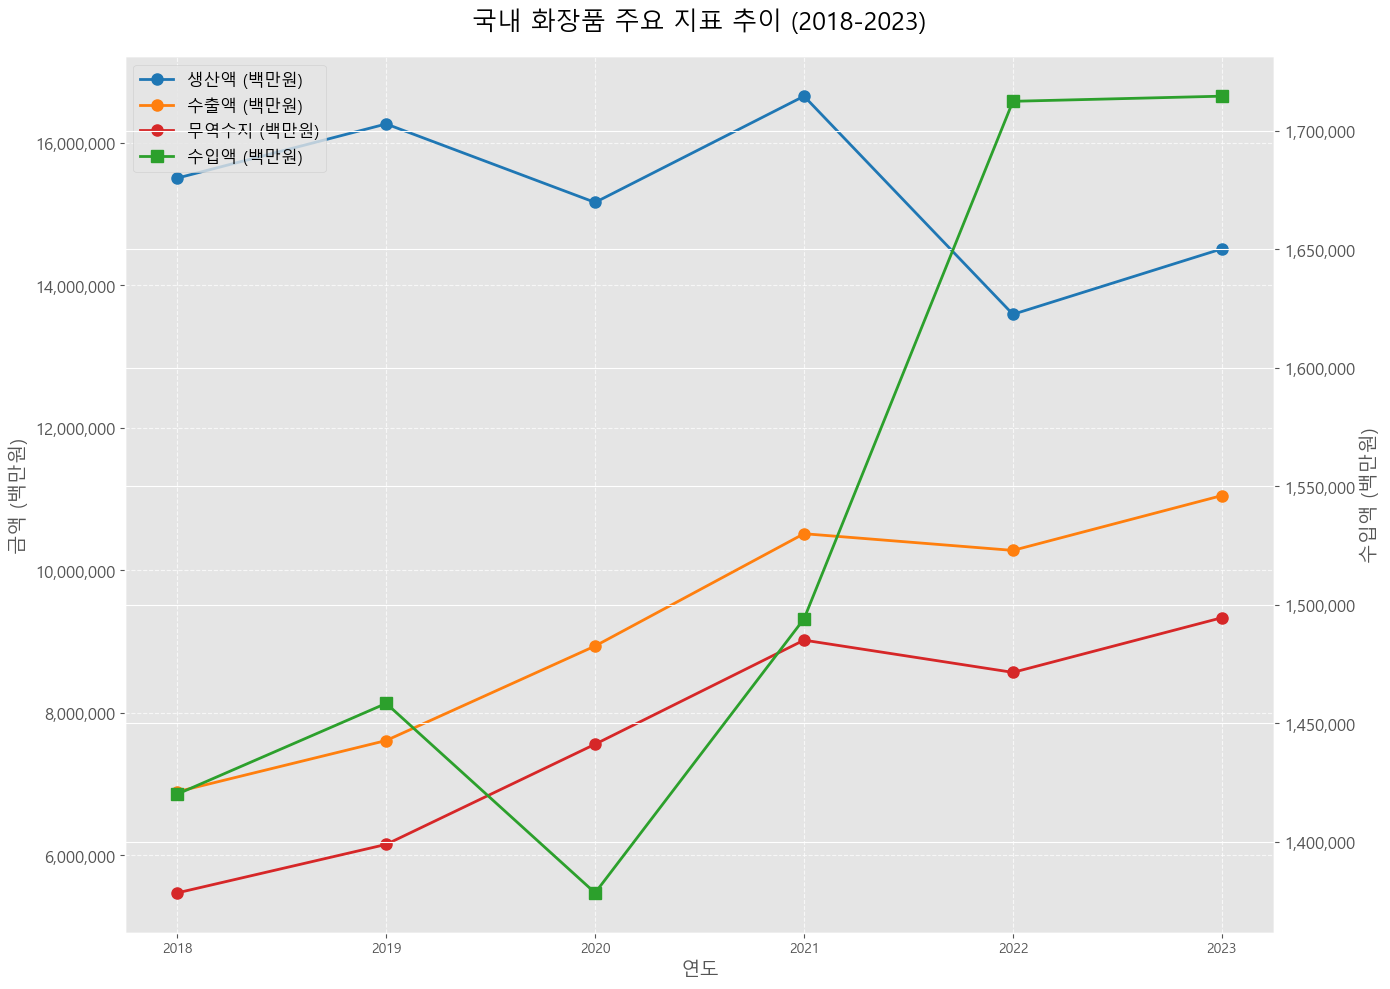

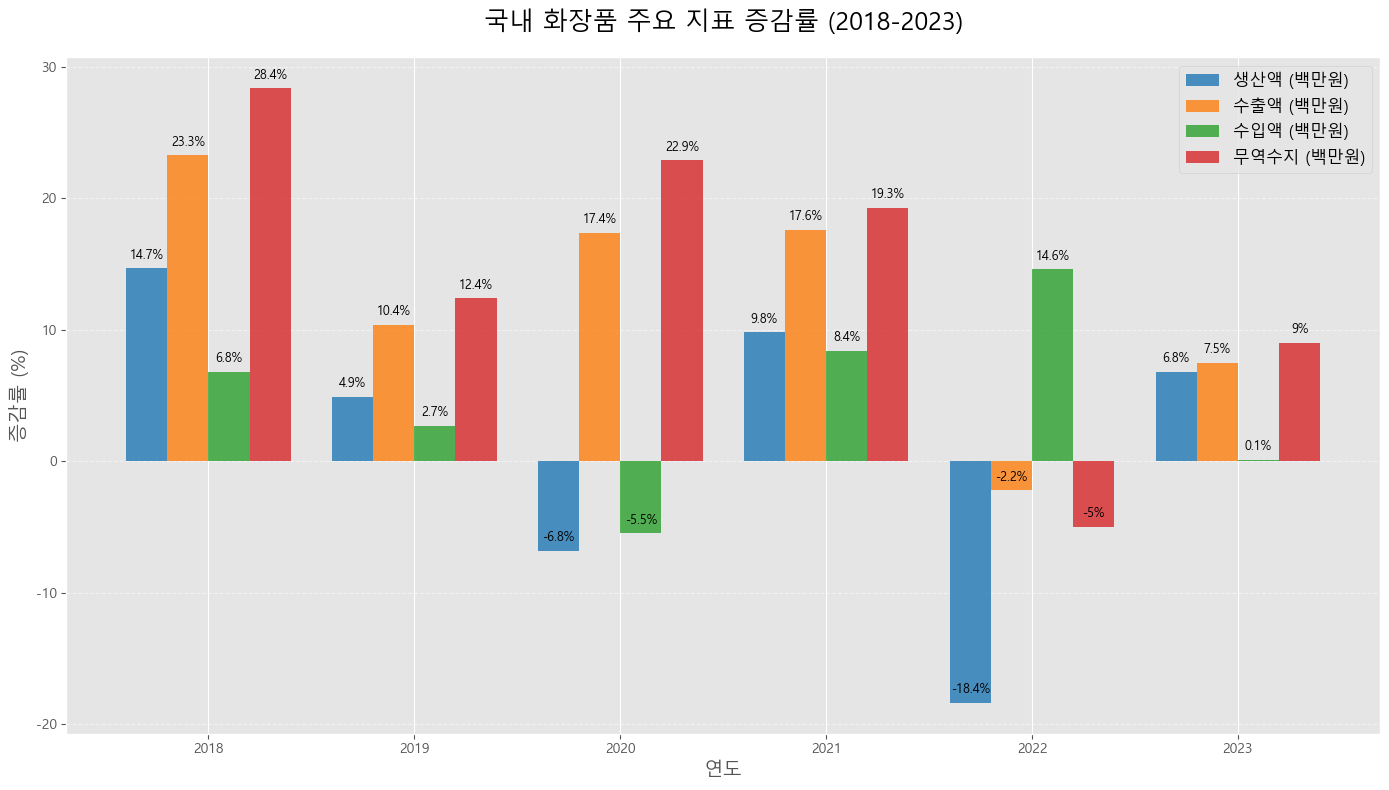

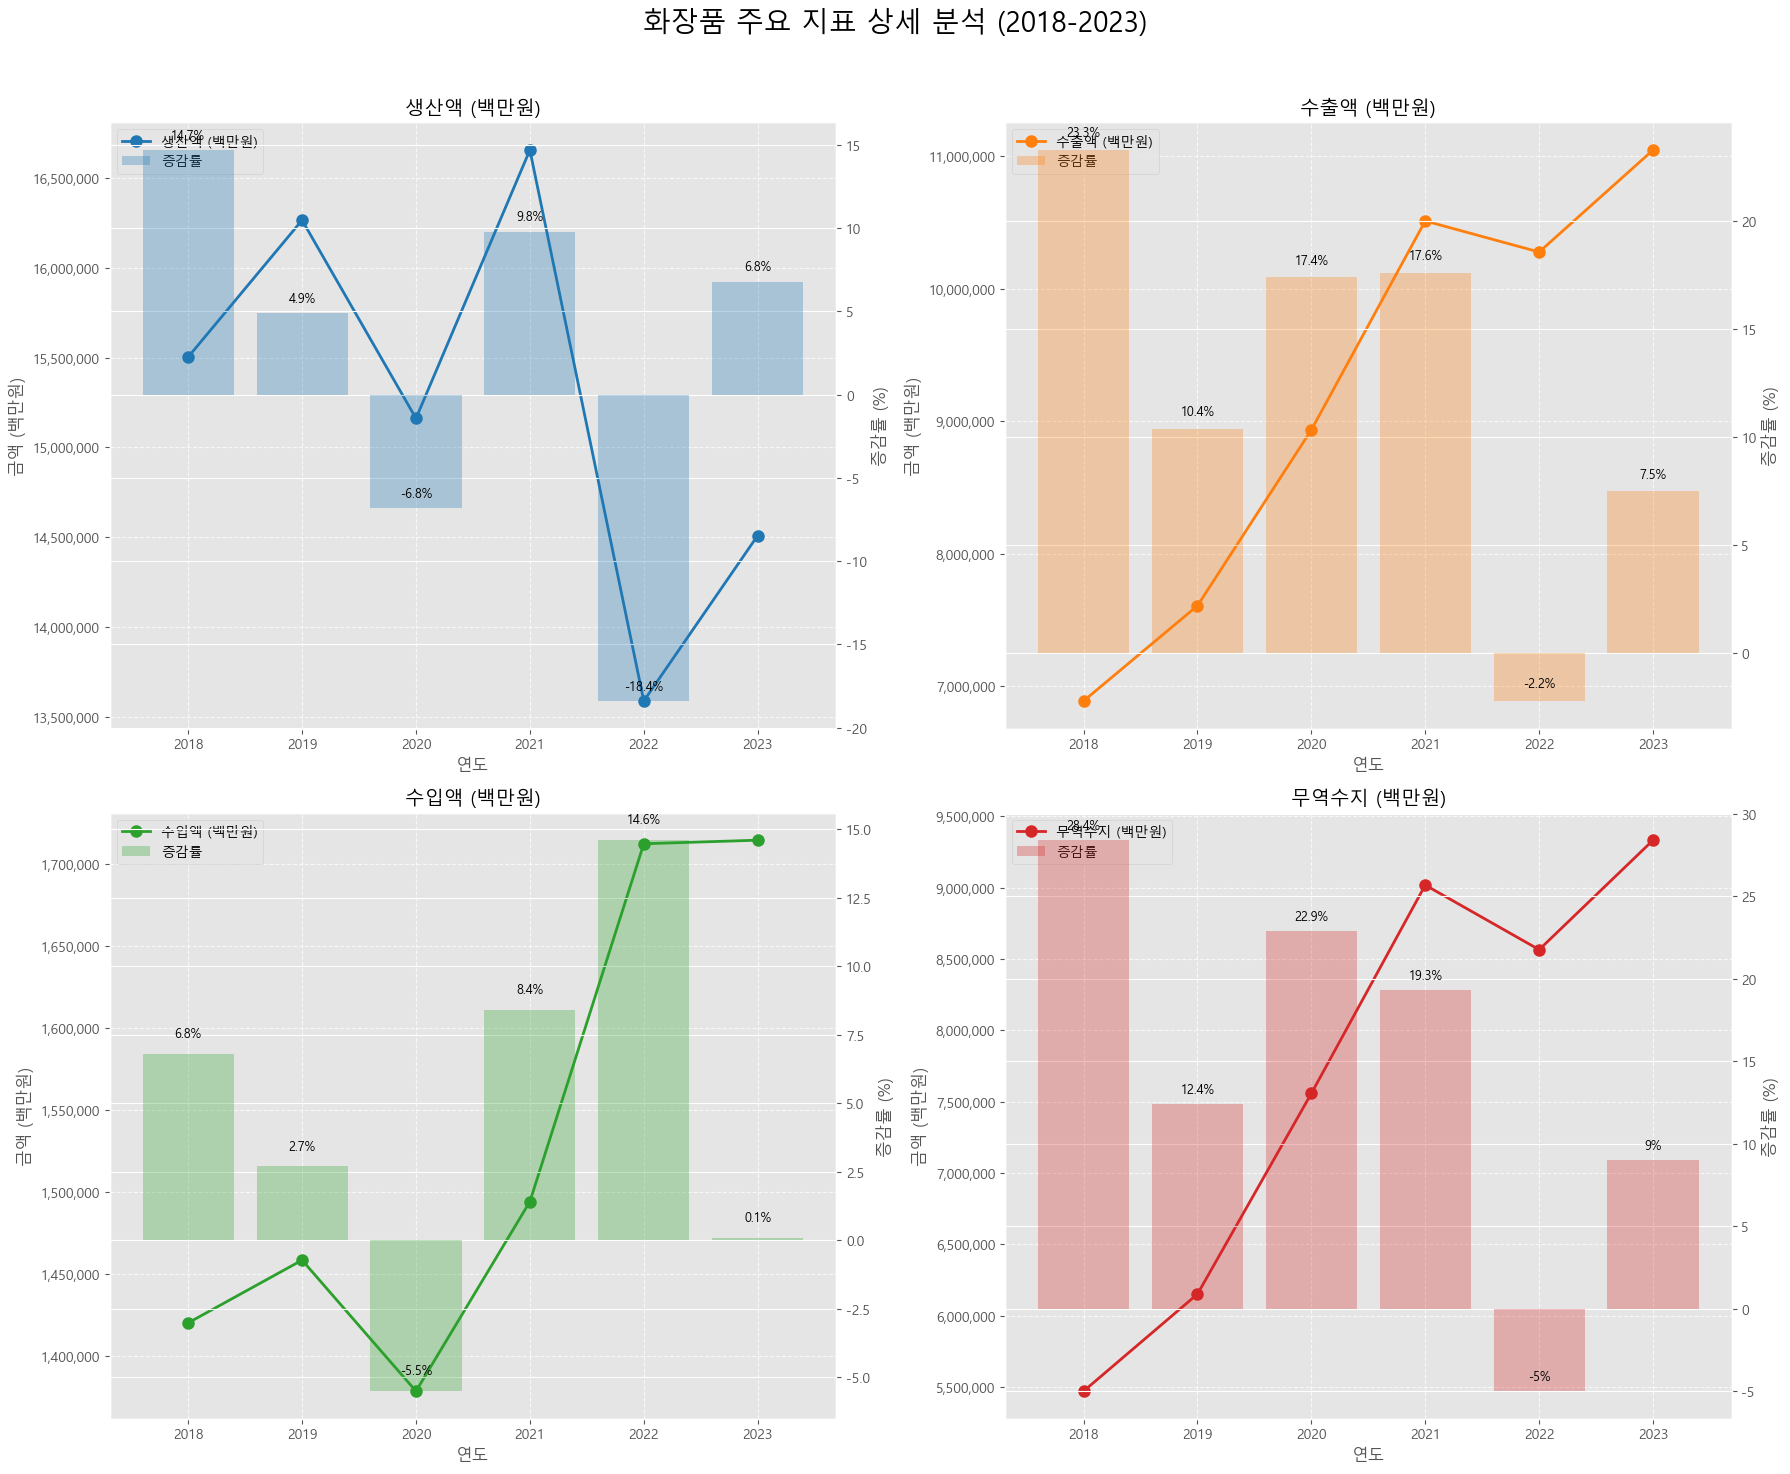

In [56]:
# 미리 색상 지정 (cmap 사용하지 않음)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# 데이터 준비
years = ['2018', '2019', '2020', '2021', '2022', '2023']
items = ['생산액 (백만원)', '수출액 (백만원)', '수입액 (백만원)', '무역수지 (백만원)']

# 실제 데이터프레임에서 항목과 일치하는 행 찾기
item_indices = {}
for item in items:
    for i, val in enumerate(df2.iloc[:, 0]):
        if item in str(val):
            item_indices[item] = i
            break

# 원데이터 값 추출
values = {}
for item in items:
    values[item] = []
    if item in item_indices:
        row_idx = item_indices[item]
        for i, year in enumerate(years):
            col_idx = i * 3 + 1  # 원데이터 열 (1, 4, 7, 10, 13, 16)
            if col_idx < df2.shape[1]:
                val = df2.iloc[row_idx, col_idx]
                # 쉼표가 있는 문자열이면 숫자로 변환
                if isinstance(val, str) and ',' in val:
                    val = int(val.replace(',', ''))
                values[item].append(val)
            else:
                values[item].append(None)

# 증감률 값 추출
growth_rates = {}
for item in items:
    growth_rates[item] = []
    if item in item_indices:
        row_idx = item_indices[item]
        for i, year in enumerate(years):
            col_idx = i * 3 + 3  # 증감률 열 (3, 6, 9, 12, 15, 18)
            if col_idx < df2.shape[1]:
                rate = df2.iloc[row_idx, col_idx]
                # % 부호가 있거나 문자열인 경우 변환
                if isinstance(rate, str):
                    if '%' in rate:
                        rate = float(rate.replace('%', ''))
                    elif rate == '-':
                        rate = 0
                    else:
                        try:
                            rate = float(rate)
                        except:
                            rate = None
                growth_rates[item].append(rate)
            else:
                growth_rates[item].append(None)

# 1. 원데이터 시각화 (생산액, 수출액, 수입액, 무역수지)
fig, ax1 = plt.subplots(figsize=(14, 10))

# 첫 번째 축(왼쪽): 생산액, 수출액, 무역수지
for i, item in enumerate(items):
    if item != '수입액 (백만원)' and item in values:  # 수입액은 두 번째 축에 표시
        ax1.plot(years, values[item], marker='o', linewidth=2, markersize=8, 
                 color=colors[i % len(colors)], label=item)

ax1.set_xlabel('연도', fontsize=14)
ax1.set_ylabel('금액 (백만원)', fontsize=14)
ax1.tick_params(axis='x', rotation=0)
ax1.tick_params(axis='y', labelsize=12)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax1.grid(True, linestyle='--', alpha=0.7)

# 두 번째 축(오른쪽): 수입액
ax2 = ax1.twinx()
import_idx = items.index('수입액 (백만원)')
ax2.plot(years, values['수입액 (백만원)'], marker='s', linewidth=2, markersize=8, 
         color=colors[import_idx % len(colors)], label='수입액 (백만원)')
ax2.set_ylabel('수입액 (백만원)', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# 범례 설정
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

plt.title('국내 화장품 주요 지표 추이 (2018-2023)', fontsize=18, pad=20)
plt.tight_layout()
plt.savefig('국내_화장품_주요지표_추이.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. 증감률 시각화
plt.figure(figsize=(14, 8))

# 각 항목의 증감률을 막대 그래프로 표시
bar_width = 0.2
positions = np.arange(len(years))

for i, item in enumerate(items):
    if item in growth_rates:
        # None 값 처리
        valid_rates = []
        valid_positions = []
        for j, rate in enumerate(growth_rates[item]):
            if rate is not None:
                valid_rates.append(rate)
                valid_positions.append(positions[j])
        
        plt.bar(np.array(valid_positions) + i*bar_width, valid_rates, 
                width=bar_width, label=item, color=colors[i % len(colors)], alpha=0.8)
        
        # 값 표시
        for j, pos in enumerate(valid_positions):
            plt.text(pos + i*bar_width, valid_rates[j] + 0.5, f'{valid_rates[j]}%', 
                    ha='center', va='bottom', fontsize=9, rotation=0)

plt.title('국내 화장품 주요 지표 증감률 (2018-2023)', fontsize=18, pad=20)
plt.xlabel('연도', fontsize=14)
plt.ylabel('증감률 (%)', fontsize=14)
plt.xticks(positions + bar_width*1.5, years)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.tight_layout()
plt.savefig('국내_화장품_주요지표_증감률.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. 각 지표별 원데이터와 증감률을 함께 보여주는 그래프
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
axes = axes.flatten()

for i, item in enumerate(items):
    if item in values and item in growth_rates:
        ax1 = axes[i]
        ax2 = ax1.twinx()
        
        # 원데이터 (선 그래프)
        ax1.plot(years, values[item], marker='o', linewidth=2, markersize=8, 
                color=colors[i % len(colors)], label=item)
        ax1.set_xlabel('연도', fontsize=12)
        ax1.set_ylabel('금액 (백만원)', fontsize=12)
        ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        
        # 증감률 (막대 그래프)
        # None 값 제외하고 시각화
        valid_rates = []
        valid_years = []
        for j, rate in enumerate(growth_rates[item]):
            if rate is not None:
                valid_rates.append(rate)
                valid_years.append(years[j])
        
        ax2.bar(valid_years, valid_rates, alpha=0.3, color=colors[i % len(colors)], label='증감률')
        ax2.set_ylabel('증감률 (%)', fontsize=12)
        
        # 증감률 값 표시
        for j, year in enumerate(valid_years):
            ax2.text(j, valid_rates[j] + 0.5, f'{valid_rates[j]}%', 
                    ha='center', va='bottom', fontsize=9)
        
        # 범례 설정
        lines, labels = ax1.get_legend_handles_labels()
        bars, bar_labels = ax2.get_legend_handles_labels()
        ax1.legend(lines + bars, labels + bar_labels, loc='upper left', fontsize=10)
        
        ax1.set_title(item, fontsize=14)
        ax1.grid(True, linestyle='--', alpha=0.7)

plt.suptitle('화장품 주요 지표 상세 분석 (2018-2023)', fontsize=20, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('국내_화장품_주요지표_상세분석.png', dpi=300, bbox_inches='tight')
plt.show()

# 이수현_미국, 일본, 중국 수입액(한국) 원본

In [16]:
df3 = pd.read_excel("./이수현_자료/미국, 일본, 중국 수입액(한국) 원본.xlsx")
df3

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,flowDesc,partnerCode,partnerISO,partnerDesc,partner2Code,partner2ISO,partner2Desc,classificationCode,classificationSearchCode,isOriginalClassification,cmdCode,cmdDesc,aggrLevel,isLeaf,customsCode,customsDesc,mosCode,motCode,motDesc,qtyUnitCode,qtyUnitAbbr,qty,isQtyEstimated,altQtyUnitCode,altQtyUnitAbbr,altQty,isAltQtyEstimated,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20210101,2021,52,2021,156,CHN,China,M,Import,410,KOR,Rep. of Korea,0,W00,World,H5,HS,True,3304,"Cosmetic and toilet preparations; beauty, make-up and skin care preparations (excluding medicaments, including sunscreen or sun tan preparations), manicure or pedicure preparations",4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,93579779,False,5,u,2813621279,False,93579779,False,0,False,3896233843.00000,NaN,3896233843.00000,0,False,True
1,C,A,20210101,2021,52,2021,392,JPN,Japan,M,Import,410,KOR,Rep. of Korea,0,W00,World,H5,HS,True,3304,"Cosmetic and toilet preparations; beauty, make-up and skin care preparations (excluding medicaments, including sunscreen or sun tan preparations), manicure or pedicure preparations",4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,13412558,False,8,kg,13412558,False,13412558,False,0,False,459855903.22500,0.00000,459855903.22500,0,False,True
2,C,A,20210101,2021,52,2021,842,USA,USA,M,Import,410,KOR,Rep. of Korea,0,W00,World,H5,HS,True,3304,"Cosmetic and toilet preparations; beauty, make-up and skin care preparations (excluding medicaments, including sunscreen or sun tan preparations), manicure or pedicure preparations",4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,31622378,False,8,kg,31622378,False,31622378,False,0,False,738584458.00000,0.00000,738584458.00000,0,False,True
3,C,A,20220101,2022,52,2022,156,CHN,China,M,Import,410,KOR,Rep. of Korea,0,W00,World,H6,HS,True,3304,"Cosmetic and toilet preparations; beauty, make-up and skin care preparations (excluding medicaments, including sunscreen or sun tan preparations), manicure or pedicure preparations",4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,67206144,False,8,kg,67206144,False,67206144,False,0,False,2570769234.00000,NaN,2570769234.00000,0,False,True
4,C,A,20220101,2022,52,2022,392,JPN,Japan,M,Import,410,KOR,Rep. of Korea,0,W00,World,H6,HS,True,3304,"Cosmetic and toilet preparations; beauty, make-up and skin care preparations (excluding medicaments, including sunscreen or sun tan preparations), manicure or pedicure preparations",4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,14131705,False,8,kg,14131705,False,14131705,False,0,False,487956601.16200,0.00000,487956601.16200,0,False,True
5,C,A,20220101,2022,52,2022,842,USA,USA,M,Import,410,KOR,Rep. of Korea,0,W00,World,H6,HS,True,3304,"Cosmetic and toilet preparations; beauty, make-up and skin care preparations (excluding medicaments, including sunscreen or sun tan preparations), manicure or pedicure preparations",4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,36332340,False,8,kg,36332340,False,36332340,False,0,False,865926806.00000,825207326.00000,865926806.00000,0,False,True
6,C,A,20230101,2023,52,2023,156,CHN,China,M,Import,410,KOR,Rep. of Korea,0,W00,World,H6,HS,True,3304,"Cosmetic and toilet preparations; beauty, make-up and skin care preparations (excluding medicaments, including sunscreen or sun tan preparations), manicure or pedicure preparations",4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,53378716,False,8,kg,53378716,False,53378716,False,0,False,2051962761.00000,NaN,2051962761.00000,0,False,True
7,C,A,20230101,2023,52,2023,392,JPN,Japan,M,Import,410,KOR,Rep. of Korea,0,W00,World,H6,HS,True,3304,"Cosmetic and toilet preparations; beauty, make-up and skin care preparations (excluding medicaments, including sunscreen or sun tan preparations), manicure or pedicure preparations",4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,14861559,False,8,kg,14861559,False,14861559,False,0,False,58080

In [17]:
df3_selected = df3[["refYear", "reporterDesc", "primaryValue", "qty"]]
df3_selected

,refYear,reporterDesc,primaryValue,qty
0,2021,China,3896233843.00000,93579779
1,2021,Japan,459855903.22500,13412558
2,2021,USA,738584458.00000,31622378
3,2022,China,2570769234.00000,67206144
4,2022,Japan,487956601.16200,14131705
5,2022,USA,865926806.00000,36332340
6,2023,China,2051962761.00000,53378716
7,2023,Japan,580804800.71200,14861559
8,2023,USA,1133132569.00000,43641376
9,2024,Japan,729267975.64000,18236864


## 시각화

In [20]:
# 주요 지표만 따로 분리된 테이블 생성
df3_pivot = df3.pivot_table(index='refYear', columns='reporterDesc', values=['primaryValue', 'qty'])

In [21]:
# 누락된 2024년 중국 데이터 처리 (2024년 데이터에 중국이 없음)
if ('primaryValue', 'China') not in df3_pivot.columns:
    # 중국 데이터가 없는 경우 NaN 값 추가
    if 2024 in df3_pivot.index:
        df3_pivot.loc[2024, ('primaryValue', 'China')] = np.nan
        df3_pivot.loc[2024, ('qty', 'China')] = np.nan

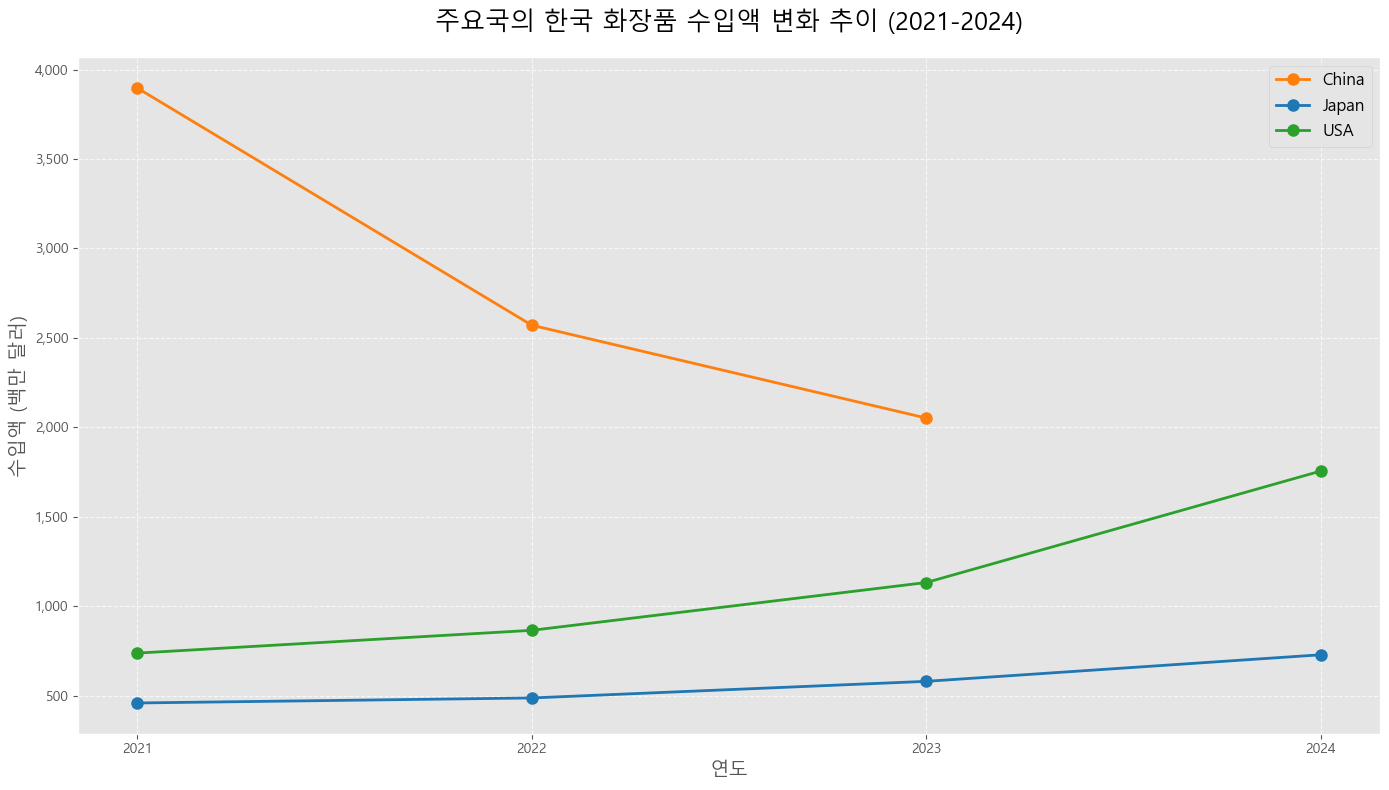

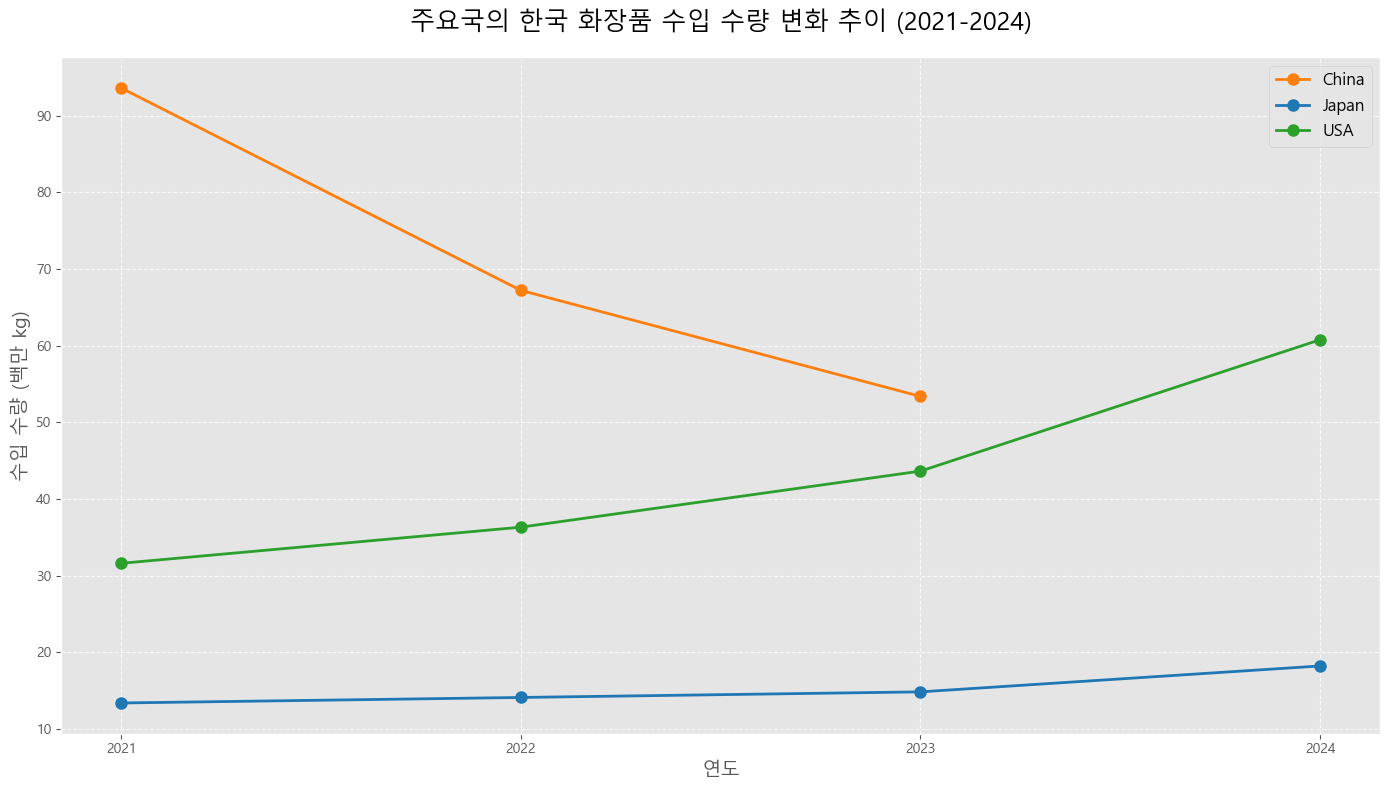

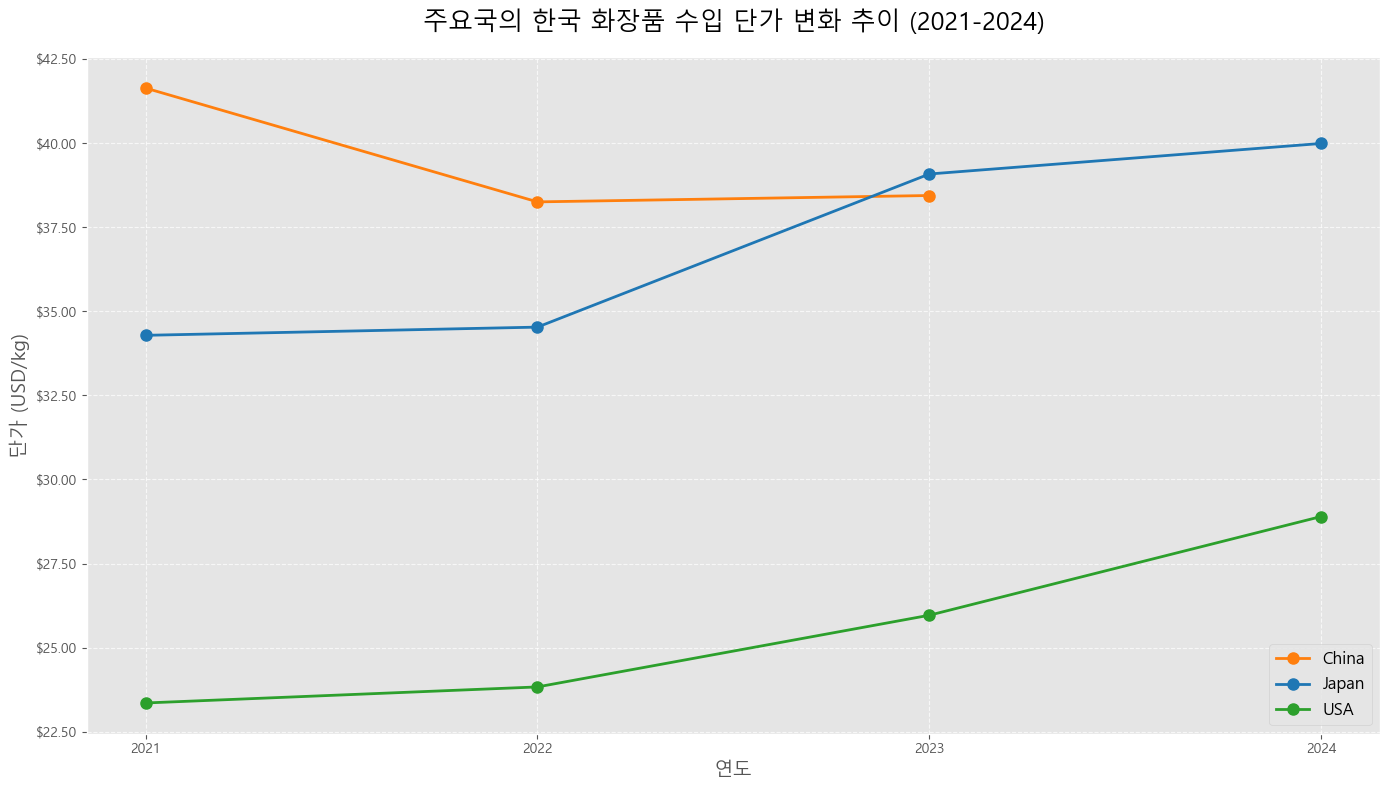

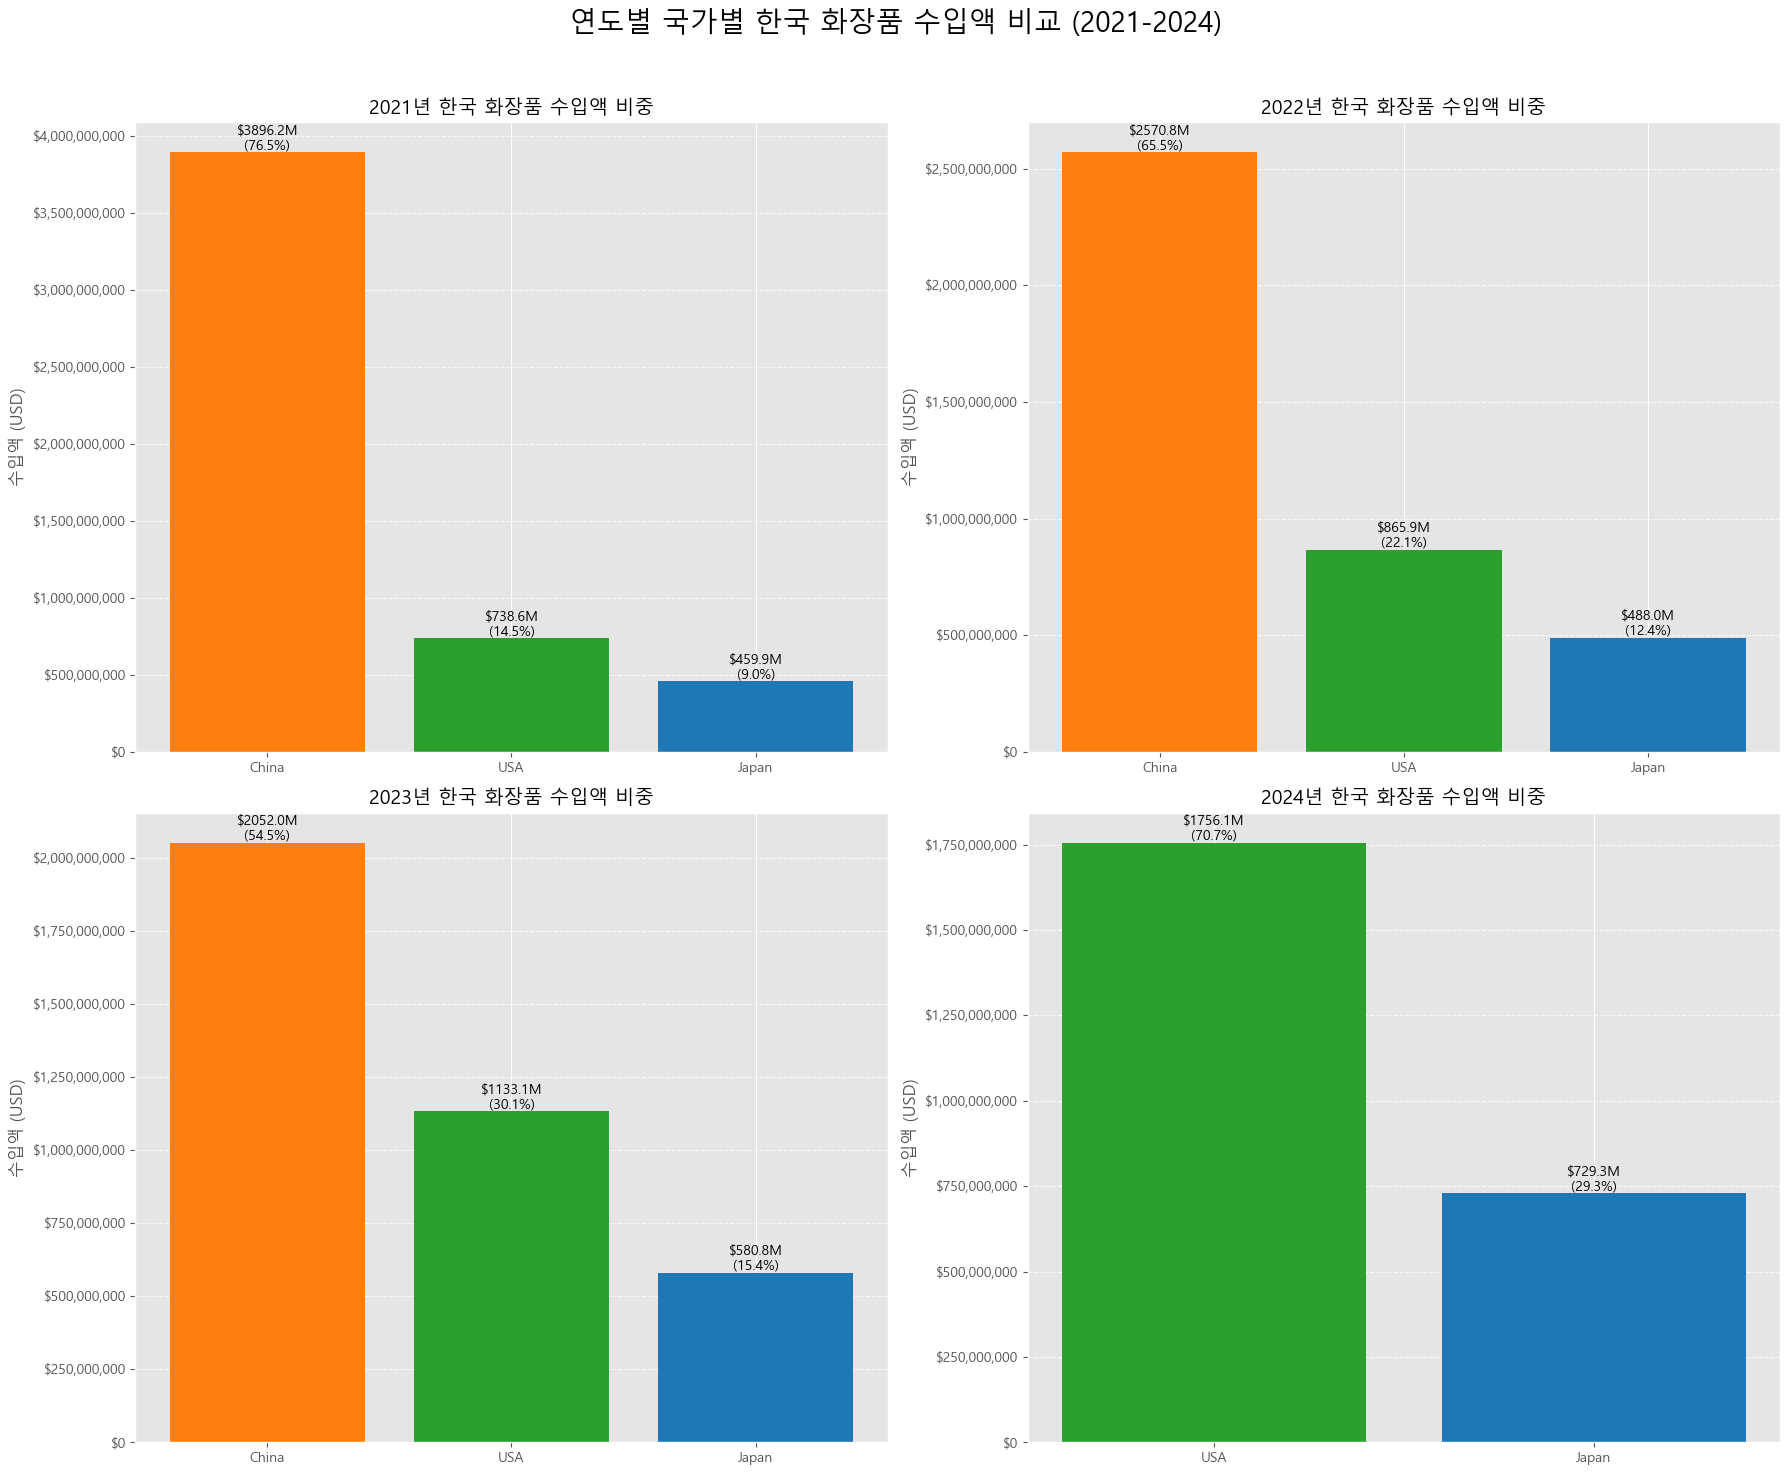

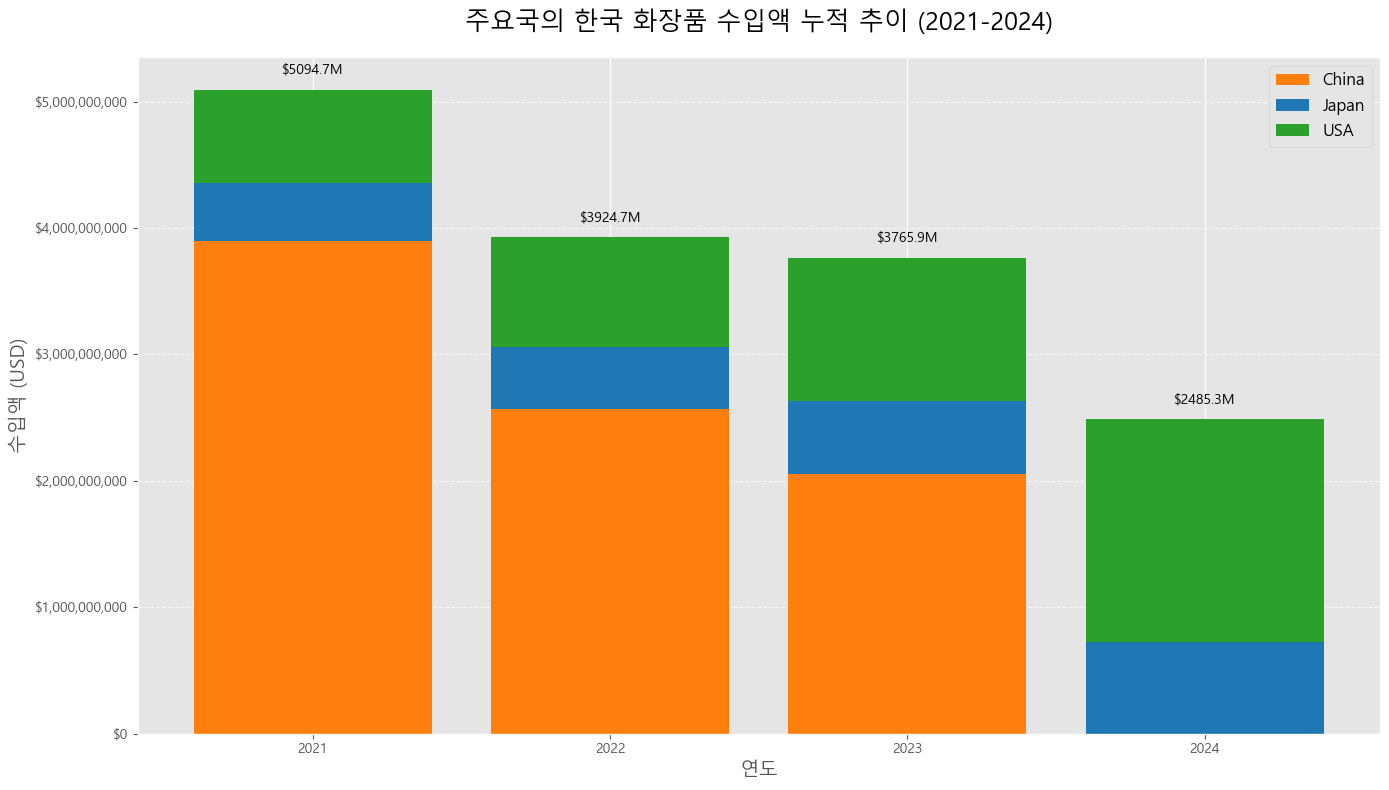

In [57]:
# 색상 정의 (중국, 일본, 미국 순서로)
colors = ['#ff7f0e', '#1f77b4', '#2ca02c']
countries = ['China', 'Japan', 'USA']

# 1. 국가별 연도별 수입액 변화 추이 그래프
plt.figure(figsize=(14, 8))

for i, country in enumerate(countries):
    if ('primaryValue', country) in df3_pivot.columns:
        years = df3_pivot.index
        values = df3_pivot['primaryValue'][country].values
        
        # NaN 값 처리
        mask = ~np.isnan(values)
        years_valid = years[mask]
        values_valid = values[mask]
        
        plt.plot(years_valid, values_valid / 1000000, marker='o', linewidth=2, 
                 markersize=8, color=colors[i], label=f'{country}')

plt.title('주요국의 한국 화장품 수입액 변화 추이 (2021-2024)', fontsize=18, pad=20)
plt.xlabel('연도', fontsize=14)
plt.ylabel('수입액 (백만 달러)', fontsize=14)
plt.xticks(df3_pivot.index)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('주요국_한국화장품_수입액_추이.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. 국가별 연도별 수입 수량 변화 추이 그래프
plt.figure(figsize=(14, 8))

for i, country in enumerate(countries):
    if ('qty', country) in df_pivot.columns:
        years = df3_pivot.index
        values = df3_pivot['qty'][country].values
        
        # NaN 값 처리
        mask = ~np.isnan(values)
        years_valid = years[mask]
        values_valid = values[mask]
        
        plt.plot(years_valid, values_valid / 1000000, marker='o', linewidth=2, 
                 markersize=8, color=colors[i], label=f'{country}')

plt.title('주요국의 한국 화장품 수입 수량 변화 추이 (2021-2024)', fontsize=18, pad=20)
plt.xlabel('연도', fontsize=14)
plt.ylabel('수입 수량 (백만 kg)', fontsize=14)
plt.xticks(df3_pivot.index)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('주요국_한국화장품_수입수량_추이.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. 국가별 단가(primaryValue/qty) 변화 추이 그래프
plt.figure(figsize=(14, 8))

for i, country in enumerate(countries):
    if ('qty', country) in df3_pivot.columns and ('primaryValue', country) in df3_pivot.columns:
        years = df3_pivot.index
        qty_values = df3_pivot['qty'][country].values
        price_values = df3_pivot['primaryValue'][country].values
        
        # NaN 값 처리 및 단가 계산
        mask = ~(np.isnan(qty_values) | np.isnan(price_values) | (qty_values == 0))
        years_valid = years[mask]
        unit_price = price_values[mask] / qty_values[mask]
        
        plt.plot(years_valid, unit_price, marker='o', linewidth=2, 
                 markersize=8, color=colors[i], label=f'{country}')

plt.title('주요국의 한국 화장품 수입 단가 변화 추이 (2021-2024)', fontsize=18, pad=20)
plt.xlabel('연도', fontsize=14)
plt.ylabel('단가 (USD/kg)', fontsize=14)
plt.xticks(df3_pivot.index)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.2f}'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('주요국_한국화장품_수입단가_추이.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. 연도별 국가간 수입액 비중 막대 그래프
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
axes = axes.flatten()

for i, year in enumerate(sorted(df3_pivot.index)):
    if i < len(axes):  # 축의 개수만큼만 그래프 생성
        ax = axes[i]
        
        # 해당 연도의 수입액 데이터 가져오기
        values = []
        labels = []
        
        for country in countries:
            if ('primaryValue', country) in df3_pivot.columns and not np.isnan(df3_pivot.loc[year, ('primaryValue', country)]):
                values.append(df3_pivot.loc[year, ('primaryValue', country)])
                labels.append(country)
        
        # 수입액 비중 계산
        total = sum(values)
        percents = [v/total*100 for v in values]
        
        # 수입액이 많은 순서대로 정렬
        sorted_idx = np.argsort(values)[::-1]
        sorted_values = [values[idx] for idx in sorted_idx]
        sorted_labels = [labels[idx] for idx in sorted_idx]
        sorted_colors = [colors[countries.index(label)] for label in sorted_labels]
        sorted_percents = [percents[idx] for idx in sorted_idx]
        
        # 막대 그래프 그리기
        bars = ax.bar(sorted_labels, sorted_values, color=sorted_colors)
        
        # 막대 위에 금액과 비율 표시
        for bar, value, percent in zip(bars, sorted_values, sorted_percents):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'${value/1000000:.1f}M\n({percent:.1f}%)',
                    ha='center', va='bottom', fontsize=10)
        
        ax.set_title(f'{year}년 한국 화장품 수입액 비중', fontsize=14)
        ax.set_ylabel('수입액 (USD)', fontsize=12)
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
        ax.grid(True, linestyle='--', alpha=0.7, axis='y')

# 빈 축 처리 (연도가 4개 미만인 경우)
for i in range(len(df_pivot.index), 4):
    axes[i].axis('off')

plt.suptitle('연도별 국가별 한국 화장품 수입액 비교 (2021-2024)', fontsize=20, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('연도별_국가별_한국화장품_수입액_비교.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. 모든 국가 연도별 누적 막대 그래프 (수입액)
plt.figure(figsize=(14, 8))

years = sorted(df3_pivot.index)
bottom = np.zeros(len(years))

for i, country in enumerate(countries):
    if ('primaryValue', country) in df3_pivot.columns:
        values = []
        for year in years:
            if year in df3_pivot.index and not np.isnan(df3_pivot.loc[year, ('primaryValue', country)]):
                values.append(df3_pivot.loc[year, ('primaryValue', country)])
            else:
                values.append(0)
        
        plt.bar(years, values, bottom=bottom, label=country, color=colors[i])
        bottom += np.array(values)

# 각 막대 위에 총액 표시
for i, year in enumerate(years):
    plt.text(year, bottom[i] + 100000000, f'${bottom[i]/1000000:.1f}M', 
             ha='center', va='bottom', fontsize=10)

plt.title('주요국의 한국 화장품 수입액 누적 추이 (2021-2024)', fontsize=18, pad=20)
plt.xlabel('연도', fontsize=14)
plt.ylabel('수입액 (USD)', fontsize=14)
plt.xticks(years)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('주요국_한국화장품_수입액_누적_추이.png', dpi=300, bbox_inches='tight')
plt.show()

# 이수현_화장품 품목별 수출액

In [90]:
df4 = pd.read_excel("./이수현_자료/화장품 품목별 수출액.xlsx", header = 0)
df4

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,품목별,HS CODE,2019년 금액,점유율,2020년 금액,점유율,증감률,2021년 금액,점유율,증감률,2022년 금액,점유율,2023년 금액,점유율,증감률,2024년 금액,점유율,증감률
1,기초화장용 제품류,3304991000,2859909,43.70%,3547447,46.90%,24%,4709425,51.30%,32.80%,3645659,45.80%,3838560,45.20%,5.30%,4583062,44.70%,19.40%
2,기타,3304999000,1513413,23.10%,1628225,21.50%,7.60%,1820203,19.80%,11.80%,1831670,23.00%,2051316,24.10%,12%,2435561,23.80%,18.70%
3,마스크 팩,3307904000,59662,0.90%,506806,6.70%,749.50%,623627,6.80%,25.90%,602443,7.60%,621454,7.30%,3.20%,776118,7.60%,24.90%
4,메이크업용 제품류,3304992000,526243,8.00%,495216,6.50%,-5.90%,593189,6.50%,17%,453344,5.70%,372700,4.40%,-17.80%,483252,4.70%,29.70%
5,기타,3307909000,658230,10.10%,303282,4.00%,-53.90%,278250,3.00%,14.60%,248765,3.10%,310075,3.60%,24.60%,422490,4.10%,36.30%
6,"피부세척용 유기계면활성제품과 조제품(액체나 크림 형태의 소매용으로 한정하며, 비누를 함유한",3401300000,156107,2.40%,242886,3.20%,55.60%,202890,2.20%,26.60%,161180,2.00%,276280,3.30%,71.40%,386401,3.80%,39.90%
7,기타,3305909000,126102,1.90%,177563,2.30%,40.80%,192334,2.10%,-36.60%,168648,2.10%,183659,2.20%,8.90%,212206,2.10%,33.90%
8,샴푸,3305100000,156190,2.40%,160315,2.10%,2.60%,186865,2.00%,5.20%,149212,1.90%,158447,1.90%,6.20%,207314,2.00%,12.90%
9,기타,3304209000,127942,2.00%,122652,1.60%,-4.10%,144661,1.60%,17.90%,146167,1.80%,144925,1.70%,-0.80%,166777,1.60%,15.10%


In [91]:
# 보기좋게 처리
df4.columns = df4.iloc[0]
df4 = df4.iloc[1:]

In [93]:
df4

,품목별,HS CODE,2019년 금액,점유율,2020년 금액,점유율,증감률,2021년 금액,점유율,증감률,2022년 금액,점유율,2023년 금액,점유율,증감률,2024년 금액,점유율,증감률
1,기초화장용 제품류,3304991000,2859909,43.70%,3547447,46.90%,24%,4709425,51.30%,32.80%,3645659,45.80%,3838560,45.20%,5.30%,4583062,44.70%,19.40%
2,기타,3304999000,1513413,23.10%,1628225,21.50%,7.60%,1820203,19.80%,11.80%,1831670,23.00%,2051316,24.10%,12%,2435561,23.80%,18.70%
3,마스크 팩,3307904000,59662,0.90%,506806,6.70%,749.50%,623627,6.80%,25.90%,602443,7.60%,621454,7.30%,3.20%,776118,7.60%,24.90%
4,메이크업용 제품류,3304992000,526243,8.00%,495216,6.50%,-5.90%,593189,6.50%,17%,453344,5.70%,372700,4.40%,-17.80%,483252,4.70%,29.70%
5,기타,3307909000,658230,10.10%,303282,4.00%,-53.90%,278250,3.00%,14.60%,248765,3.10%,310075,3.60%,24.60%,422490,4.10%,36.30%
6,"피부세척용 유기계면활성제품과 조제품(액체나 크림 형태의 소매용으로 한정하며, 비누를 함유한",3401300000,156107,2.40%,242886,3.20%,55.60%,202890,2.20%,26.60%,161180,2.00%,276280,3.30%,71.40%,386401,3.80%,39.90%
7,기타,3305909000,126102,1.90%,177563,2.30%,40.80%,192334,2.10%,-36.60%,168648,2.10%,183659,2.20%,8.90%,212206,2.10%,33.90%
8,샴푸,3305100000,156190,2.40%,160315,2.10%,2.60%,186865,2.00%,5.20%,149212,1.90%,158447,1.90%,6.20%,207314,2.00%,12.90%
9,기타,3304209000,127942,2.00%,122652,1.60%,-4.10%,144661,1.60%,17.90%,146167,1.80%,144925,1.70%,-0.80%,166777,1.60%,15.10%
10,기타,3304109000,105168,1.60%,104457,1.40%,-0.70%,117333,1.30%,12.30%,138696,1.70%,127392,1.50%,-8.20%,126136,1.20%,-1%


## 시각화

# 이정민_GDP

In [25]:
df5= pd.read_csv("./이정민_자료/주요_단기_경제_지표_＞_기준_시리즈__GDP__20250503203418.csv", encoding = "euc-kr")
df5

,국가(1),경제활동(1),변환(1),2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.1,2021.11,2021.12,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.1,2022.11,2022.12,2023.01,2023.02,2023.03,2023.04,2023.05,2023.06,2023.07,2023.08,2023.09,2023.1,2023.11,2023.12,2024.01,2024.02,2024.03,2024.04,2024.05,2024.06,2024.07,2024.08,2024.09,2024.1,2024.11,2024.12,2025.01,2025.02
0,국가(1),경제활동(1),변환(1),지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수
1,국가(1),경제활동(1),변환(1),추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율,추세비율
2,일본,전체(모든 활동),변환 해당없음,98.471,98.568,98.676,98.776,98.857,98.914,98.965,99.031,99.122,99.222,99.305,99.358,99.395,99.444,99.519,99.605,99.674,99.709,99.722,99.739,99.787,99.885,100.039,100.242,100.468,100.681,100.845,100.933,100.928,100.831,100.669,100.481,100.297,100.129,99.982,99.86,99.776,99.748,99.782,99.866,99.979,100.102,100.225,100.345,100.46,100.566,100.661,-,-,-
3,대한민국,전체(모든 활동),변환 해당없음,99.237,99.535,99.778,99.96,100.082,100.153,100.205,100.272,100.375,100.503,100.634,100.745,100.833,100.901,100.951,100.977,100.971,100.923,100.826,100.683,100.501,100.306,100.126,99.983,99.883,99.823,99.8,99.804,99.83,99.873,99.926,99.986,100.05,100.124,100.208,100.295,100.362,100.38,100.332,100.225,100.079,99.918,99.757,99.609,99.484,99.392,99.336,-,-,-
4,미국,전체(모든 활동),변환 해당없음,98.226,98.57,98.802,98.992,99.155,99.349,99.561,99.781,99.991,100.159,100.248,100.237,100.142,99.995,99.831,99.679,99.56,99.487,99.456,99.462,99.492,99.537,99.584,99.628,99.667,99.702,99.74,99.786,99.846,99.923,100.008,100.09,100.156,100.2,100.221,100.22,100.208,100.196,100.194,100.203,100.223,100.248,100.272,100.292,100.302,100.303,100.294,-,-,-
5,[비회원국]중국,전체(모든 활동),변환 해당없음,103.36,103.36,103.307,103.206,103.061,102.88,102.669,102.44,102.203,101.971,101.751,101.549,101.367,101.208,101.073,100.957,100.857,100.763,100.665,100.556,100.434,100.298,100.153,100.012,99.881,99.761,99.655,99.564,99.495,99.445,99.412,99.395,99.391,99.398,99.411,99.422,99.425,99.416,99.396,99.369,99.338,99.304,99.272,99.243,99.219,99.199,99.183,99.171,99.16,99.154


In [26]:
df6 = pd.read_csv("./이정민_자료/CPI.csv", encoding = "euc-kr")
df6

,국가,기준 단위,경제활동,조정,변환,항목,단위,2020.09 월,2021.01 월,2021.02 월,2021.03 월,2021.04 월,2021.05 월,2021.06 월,2021.07 월,2021.08 월,2021.09 월,2021.10 월,2021.11 월,2021.12 월,2022.01 월,2022.02 월,2022.03 월,2022.04 월,2022.05 월,2022.06 월,2022.07 월,2022.08 월,2022.09 월,2022.10 월,2022.11 월,2022.12 월,2023.01 월,2023.02 월,2023.03 월,2023.04 월,2023.05 월,2023.06 월,2023.07 월,2023.08 월,2023.09 월,2023.10 월,2023.11 월,2023.12 월,2024.01 월,2024.02 월,2024.03 월,2024.04 월,2024.05 월,2024.06 월,2024.07 월,2024.08 월,2024.09 월,2024.10 월,2024.11 월,2024.12 월,2025.01 월,2025.02 월,2025.03 월
0,일본,지수 (2015=100),경제활동 해당없음,조정 해당없음,변환 해당없음,소비자 물가,NaN,101.70527,101.60346,101.60346,101.70527,100.89081,101.19623,101.29804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,일본,성장률,경제활동 해당없음,조정 해당없음,성장률(전기대비),소비자 물가,NaN,-0.20000,0.50000,-0.10000,0.10000,-0.80000,0.30000,0.10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,일본,성장률,경제활동 해당없음,조정 해당없음,성장률(전년동기대비),소비자 물가,NaN,0.00000,-0.70000,-0.50000,-0.40000,-1.10000,-0.80000,-0.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,대한민국,지수 (2015=100),경제활동 해당없음,조정 해당없음,변환 해당없음,소비자 물가,NaN,106.19758,106.51383,107.08309,107.35717,107.50476,107.57855,107.57855,107.79993,108.31647,108.75923,108.94898,109.49715,109.67636,110.53024,111.13112,111.84796,112.61751,113.32380,114.07227,114.62044,114.51502,114.71532,115.07374,114.97886,115.17915,116.03303,116.30712,116.50741,116.77096,117.15046,117.18208,117.31913,118.36276,118.96364,119.40639,118.78443,118.83714,119.30098,119.94402,120.12323,120.18648,120.28136,120.00727,120.31298,120.74520,120.86116,120.90332,120.59761,121.13524,121.97858,122.36863,122.59000
4,대한민국,성장률,경제활동 해당없음,조정 해당없음,성장률(전기대비),소비자 물가,NaN,0.54896,0.70766,0.53444,0.25596,0.13747,0.06864,0.00000,0.20578,0.47917,0.40876,0.17447,0.50314,0.16367,0.77855,0.54363,0.64504,0.68803,0.62716,0.66047,0.48055,-0.09197,0.17491,0.31244,-0.08245,0.17420,0.74135,0.23621,0.17221,0.22620,0.32500,0.02700,0.11695,0.88957,0.50766,0.37218,-0.52088,0.04437,0.39031,0.53901,0.14941,0.05265,0.07894,-0.22787,0.25474,0.35924,0.09604,0.03489,-0.25286,0.44580,0.69620,0.31976,0.18091
5,대한민국,성장률,경제활동 해당없음,조정 해당없음,성장률(전년동기대비),소비자 물가,NaN,0.94795,0.94915,1.41773,1.90114,2.49246,2.62470,2.34681,2.63977,2.55515,2.41215,3.16430,3.77660,3.69780,3.77078,3.78027,4.18303,4.75583,5.34052,6.03626,6.32701,5.72263,5.47640,5.62167,5.00626,5.01730,4.97854,4.65756,4.16588,3.68810,3.37674,2.72618,2.35446,3.36003,3.70336,3.76512,3.30980,3.17591,2.81639,3.12698,3.10351,2.92498,2.67255,2.41094,2.55189,2.01283,1.59504,1.25364,1.52645,1.93382,2.24441,2.02144,2.05353
6,미국,지수 (2015=100),경제활동 해당없음,조정 해당없음,변환 해당없음,소비자 물가,NaN,109.81491,110.36424,110.96841,111.75443,112.67293,113.57624,114.63144,115.18288,115.42083,115.73431,116.69585,117.26923,117.62954,118.61934,119.70281,121.30100,121.97817,123.32280,125.01677,125.00200,124.95770,125.22646,125.73444,125.60745,125.22182,126.22301,126.92760,127.34783,127.99208,128.31442,128.72874,128.97429,129.53754,129.85946,129.80968,129.54809,129.41941,130.12442,130.92985,131.77620,132.28925,132.50906,132.55378,132.70778,132.81579,133.02885,133.18201,133.10986,133.15712,134.02878,134.62410,NaN
7,미국,성장률,경제활동 해당없음,조정 해당없음,성장률(전기대비),소비자 물가,NaN,0.13927,0.42538,0.54744,0.70833,0.82189,0.80171,0.92907,0.48105,0.20659,0.27160,0.83081,0.49134,0.30725,0.84146,0.91340,1.33514,0.55825,1.10235,1.37361,-0.01181,-0.03544,0.21508,0.40565,-0.10100,-0.30701,0.79954,0.55821,0.33107,0.50590,0.25184,0.32289,0.19075,0.43672,0.24851,-0.03834,-0.20151,-0.09933,0.54475,0.61897,0.64642,0.38933,0.16616,0.03375,0.11618,0.08139,0.16042,0.11513,-0.05417,0.03550,0.65462,0.44417,NaN
8,미국,성장률,경제활동

In [27]:
df7 = pd.read_csv("./이정민_자료/CLI.csv", encoding = "euc-kr")
df7

,국가(1),경제활동(1),변환(1),2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.1,2021.11,2021.12,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.1,2022.11,2022.12,2023.01,2023.02,2023.03,2023.04,2023.05,2023.06,2023.07,2023.08,2023.09,2023.1,2023.11,2023.12,2024.01,2024.02,2024.03,2024.04,2024.05,2024.06,2024.07,2024.08,2024.09,2024.1,2024.11,2024.12,2025.01,2025.02,2025.03
0,국가(1),경제활동(1),변환(1),지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수,지수
1,국가(1),경제활동(1),변환(1),진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정,진폭조정
2,일본,전체(모든 활동),변환 해당없음,99.64,99.912,100.169,100.395,100.564,100.666,100.704,100.694,100.664,100.636,100.625,100.622,100.618,100.599,100.574,100.545,100.511,100.472,100.427,100.373,100.303,100.229,100.154,100.093,100.054,100.036,100.036,100.043,100.06,100.08,100.097,100.109,100.101,100.07,100.025,99.986,99.98,100.012,100.057,100.105,100.144,100.159,100.147,100.108,100.058,99.994,99.927,99.87,99.831,99.803,99.784
3,대한민국,전체(모든 활동),변환 해당없음,101.984,102.293,102.544,102.708,102.738,102.62,102.382,102.07,101.719,101.374,101.081,100.85,100.66,100.506,100.373,100.233,100.055,99.831,99.577,99.304,98.99,98.64,98.293,98.01,97.823,97.762,97.82,97.967,98.177,98.408,98.613,98.803,98.993,99.196,99.424,99.668,99.911,100.144,100.346,100.506,100.612,100.677,100.706,100.705,100.684,100.661,100.66,100.704,100.791,100.91,101.037
4,미국,전체(모든 활동),변환 해당없음,100.324,100.696,101.017,101.278,101.346,101.344,101.29,101.217,101.156,101.115,101.081,101.027,100.937,100.801,100.603,100.343,100.027,99.704,99.426,99.209,99.041,98.909,98.808,98.743,98.702,98.673,98.661,98.687,98.748,98.837,98.924,98.989,99.029,99.062,99.122,99.222,99.356,99.498,99.619,99.688,99.715,99.736,99.792,99.896,100.047,100.226,100.406,100.555,100.648,100.68,100.678
5,[비회원국]중국,전체(모든 활동),변환 해당없음,102.871,102.821,102.668,102.425,102.1,101.701,101.246,100.775,100.329,99.936,99.597,99.292,99.001,98.709,98.424,98.17,97.968,97.833,97.767,97.791,97.911,98.126,98.445,98.864,99.346,99.842,100.307,100.717,101.07,101.371,101.595,101.714,101.709,101.586,101.361,101.058,100.699,100.312,99.924,99.564,99.251,98.999,98.831,98.774,98.844,99.029,99.285,99.576,99.878,100.185,100.488
